In [ ]:
## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

## Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

## Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
## which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [25]:
df = pd.read_csv('C:\\Users\\gebruiker\\IH_LABS\\lab-eda-univariate\\amz_uk_price_prediction_dataset.csv')
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [27]:
df.shape

(2443651, 9)

In [29]:
df.nunique()

uid                  2443651
asin                 2222742
title                2077591
stars                     42
reviews                19446
price                  82916
isBestSeller               2
boughtInLastMonth         25
category                 296
dtype: int64

In [31]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [33]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('bool'), dtype('int64'), dtype('O')]

In [ ]:
## 1 Frequency Tables**:
    ## Generate a frequency table for the product `category`.
    ## Which are the top 5 most listed product categories?

In [41]:
# Column frequency per category
frecuency_categ = df['category'].value_counts()

# Select top 5 product
top_5_category = frecuency_categ.head(5)
top_5_category

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [ ]:
## 2 Visualizations**:
   ## Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
   ## For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


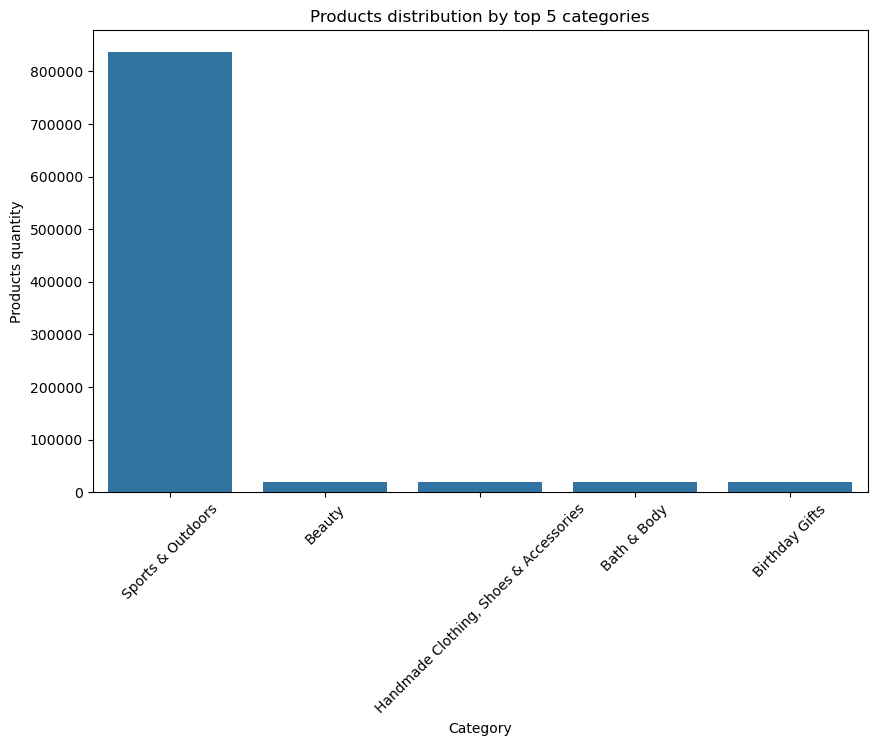

In [51]:
# Visualization Bar chart 
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_category.index, y=top_5_category.values);
plt.title('Products distribution by top 5 categories')
plt.xlabel('Category')
plt.ylabel('Products quantity')
plt.xticks(rotation=45)
plt.show()

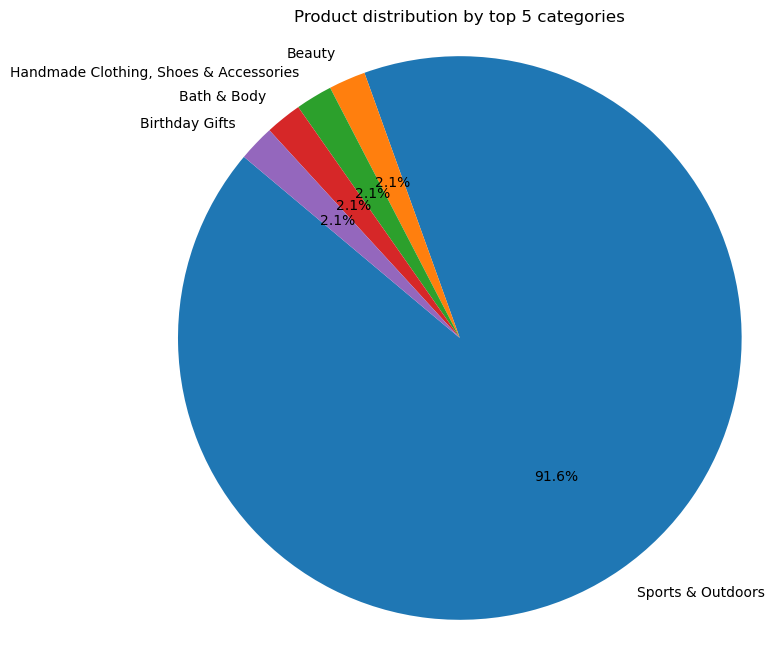

In [57]:
# Visualization Pie chart 
plt.figure(figsize=(8, 8))
plt.pie(top_5_category, labels=top_5_category.index, autopct='%1.1f%%', startangle=140)
plt.title('Product distribution by top 5 categories')
plt.axis('equal')
plt.show()

In [ ]:
### Part 2: Delving into Product Pricing

## Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

In [ ]:
## Measures of Centrality**:
   ## Calculate the mean, median, and mode for the `price` of products.
   ## What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [59]:
# Calculate the mean, median, and mode for the `price` of products
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [ ]:
## 2 Measures of Dispersion**:
    ## Determine the variance, standard deviation, range, and interquartile range for product `price`.
    ## How varied are the product prices? Are there any indicators of a significant spread in prices?

In [65]:
variance_price = df['price'].var()
std_dev_price = df['price'].std()
range_price = df['price'].max() - df['price'].min()
quantiles_price = df['price'].quantile([0.25, 0.50,  0.75])

variance_price, std_dev_price, range_price, quantiles_price

(119445.48532256528,
 345.60886175352226,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [ ]:
## Given that the mean is €89.24 and the standard deviation is nearly four times the mean, we can conclude that the distribution is quite spread out. This is further illustrated by the large range, which amounts to 100,000.

In [ ]:
## Visualizations**:
    ## Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    ## Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

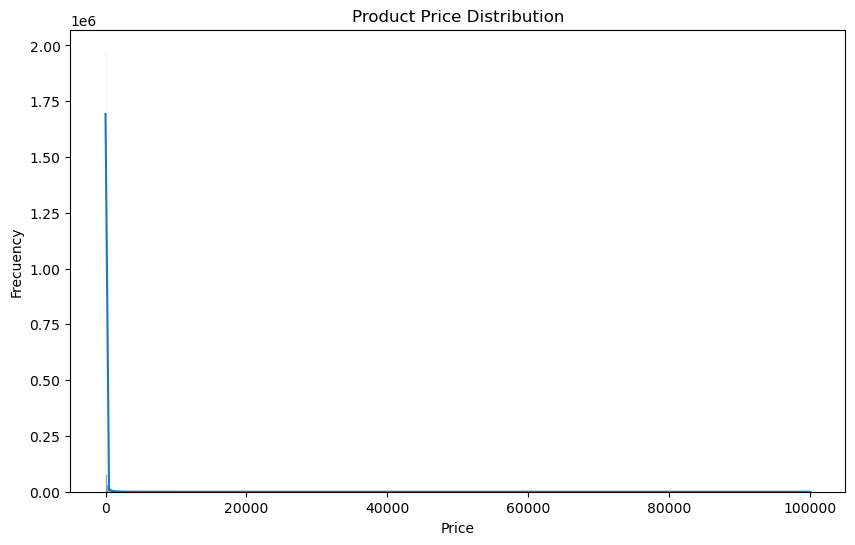

In [72]:
# Visualization histogram chart 

num_bins = int(np.ceil(np.sqrt(len(df['price']))))

plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=num_bins, kde=True)
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frecuency')
plt.show()

In [ ]:
## This histogram is challenging to interpret due to the presence of outliers. We could either filter out these outliers or employ a logarithmic scale for better clarity.

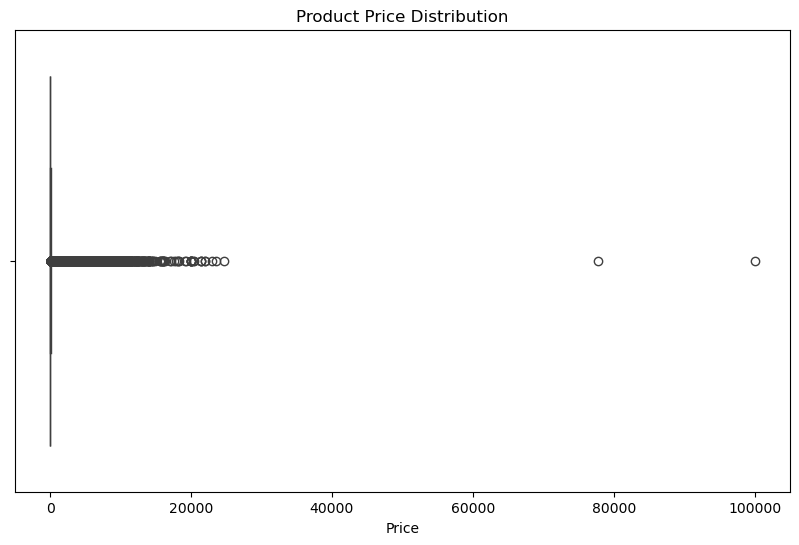

In [76]:
# Visualization box chart
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Product Price Distribution')
plt.xlabel('Price')
plt.show()

In [ ]:
### Part 3: Unpacking Product Ratings

In [ ]:
## Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

In [ ]:
## 1 Measures of Centrality**:
    ## Calculate the mean, median, and mode for the `rating` of products.
    ## How do customers generally rate products? Is there a common trend?

In [82]:
mean_rating = df['stars'].mean()
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating, median_rating, mode_rating 

(2.152836472966065, 0.0, 0.0)

In [86]:
## There's a tendency toward lower ratings

In [ ]:
## 2 Measures of Dispersion**:
    ## Determine the variance, standard deviation, and interquartile range for product `rating`.
    ## Are the ratings consistent, or is there a wide variation in customer feedback?

In [90]:
var_rating = df['stars'].var()
std_rating = df['stars'].std()


Q1 = df['stars'].quantile(0.25)
Q3 = df['stars'].quantile(0.75)
IQR_rating = Q3 - Q1

var_rating, std_rating, IQR_rating

(4.81743402976196, 2.1948653785054697, 4.4)

In [ ]:
## There is a wide variation in the scores, as the standard deviation and especially the IQR are quite high, nearly 5

In [ ]:
## Shape of the Distribution**:
    ## Calculate the skewness and kurtosis for the `rating` column. 
    ## Are the ratings normally distributed, or do they lean towards higher or lower values?

In [96]:
from scipy.stats import skew, kurtosis
stars_skewness = skew(df['stars'])
stars_kurtosis = kurtosis(df['stars'], fisher=False)
stars_skewness, stars_kurtosis

(0.08120730776283354, 1.073995357450161)

In [ ]:
## It has positive skewness, indicating a longer tail on the right. Additionally, the kurtosis is less than 3, suggesting that it tends to be flatter and have lower values than a normal distribution

In [ ]:
## Visualizations**:
    ## Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

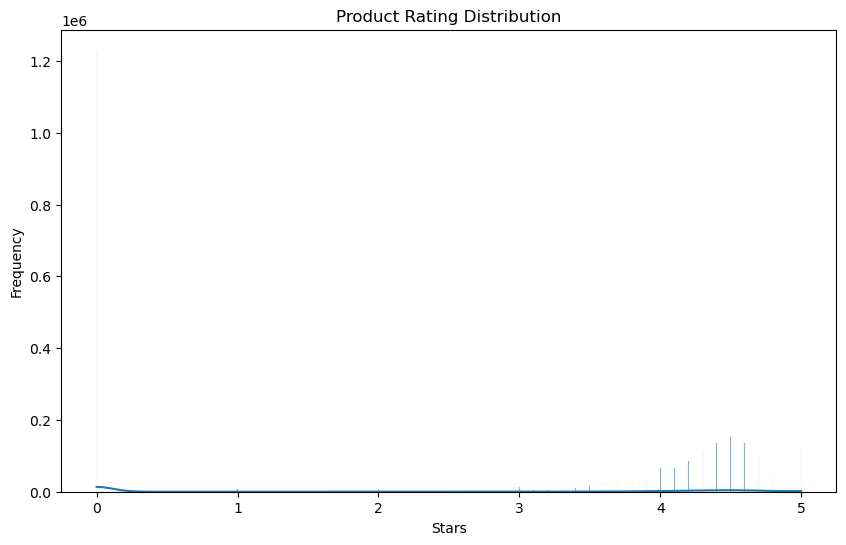

In [102]:
# Assuming df is your DataFrame containing 'stars' column
num_bins_st = int(np.ceil(np.sqrt(len(df['stars']))))

plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=num_bins_st, kde=True)

# Update titles and labels as needed
plt.title('Product Rating Distribution')
plt.xlabel('Stars')
plt.ylabel('Frequency')

plt.show()